# **Plant Disease Classification**

---

![alt text](https://cdn-images-1.medium.com/max/1200/1*FswlF4lZPQ4kT_gkybacZw.jpeg)


# Introduction

Getting affected by a disease is very common in plants due to various factors such as fertilizers, cultural practices followed, environmental conditions, etc. These diseases hurt agricultural yield and eventually the economy based on it. 

Any technique or method to overcome this problem and getting a warning before the plants are infected would aid farmers to efficiently cultivate crops or plants, both qualitatively and quantitatively. Thus, disease detection in plants plays a very important role in agriculture.


# Download Dataset


First, we download the `PlantVillage` dataset from Google Drive by using the unique `id` it holds and unzip the downloaded **PlantVillage.zip** into the **PlantVillage** dataset folder.

# Import Libraries


Importing necessary libraries and modules required to build the classification model.

In [30]:
# import numpy as np
# import pickle
# import cv2
# import os
# import matplotlib.pyplot as plt
# from os import listdir
# from sklearn.preprocessing import LabelBinarizer
# from keras.models import Sequential
from keras.layers import BatchNormalization
# from keras.layers.convolutional import Conv2D
# from keras.layers.convolutional import MaxPooling2D
# from keras.layers.core import Activation, Flatten, Dropout, Dense
# from keras import backend as K
# from keras.preprocessing.image import ImageDataGenerator
# from keras.optimizers import Adam
# from keras.preprocessing import image
# from keras.utils import img_to_array
# from sklearn.preprocessing import MultiLabelBinarizer
# from sklearn.model_selection import train_test_split

In [31]:
# Building CNN based on AlexNet Architecture

# Importing Keras libraries and packages
from keras.models import Sequential
from keras.layers import (Convolution2D)
# , MaxPooling2D, Flatten, Dense, Dropout
# from keras import optimizers
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ModelCheckpoint

In [32]:
# import json
# import time
# 
# import joblib
# import keras
# import tensorflow
# from keras.models import load_model
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import MaxPooling2D
# from keras.regularizers import l2
# from keras.optimizers import SGD, RMSprop
# from keras.utils import to_categorical
# from keras.utils.vis_utils import plot_model
# from keras.layers import Input, GlobalAveragePooling2D, concatenate, AveragePooling2D
# from keras import models
# from keras.models import Model
from keras_preprocessing.image import ImageDataGenerator
# import numpy as np
# from keras import regularizers
# from keras import backend as K
# from keras.applications.inception_v3 import InceptionV3
import matplotlib.pyplot as plt
#from keras.callbacks import tensorboard_v1

In [33]:
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

# Load Dataset

Initializing a few parameters required for the image dataset preprocessing.

In [34]:
import os
import shutil
import random

def split_dataset(root_dir, new_root_dir):
    """
    Divise un ensemble de données d'images en ensemble d'entraînement (80%) et de test (20%)
    dans une nouvelle structure de dossiers.

    Args:
        root_dir (str): Chemin vers le dossier racine contenant les sous-dossiers de classes d'images.
        new_root_dir (str): Chemin vers le nouveau dossier racine pour la nouvelle structure de dossiers.
    """
    # Créer les dossiers "train" et "test" dans le nouveau dossier racine
    os.makedirs(os.path.join(new_root_dir, "train"), exist_ok=True)
    os.makedirs(os.path.join(new_root_dir, "val"), exist_ok=True)

    # Parcourir les sous-dossiers dans le dossier racine
    for subfolder in os.listdir(root_dir):
        subfolder_path = os.path.join(root_dir, subfolder)
        if os.path.isdir(subfolder_path):
            # Créer les sous-dossiers "train" et "test" pour chaque classe
            os.makedirs(os.path.join(new_root_dir, "train", subfolder), exist_ok=True)
            os.makedirs(os.path.join(new_root_dir, "val", subfolder), exist_ok=True)

            # Obtenir la liste des fichiers dans le sous-dossier
            files = os.listdir(subfolder_path)
            # Mélanger les fichiers
            random.shuffle(files)

            # Diviser les fichiers en 80% pour l'entraînement et 20% pour le test
            train_files = files[:int(0.8 * len(files))]
            test_files = files[int(0.8 * len(files)):]

            # Copier les fichiers dans les nouveaux dossiers
            for file in train_files:
                shutil.copy(
                    os.path.join(subfolder_path, file),
                    os.path.join(new_root_dir, "train", subfolder, file)
                )
            for file in test_files:
                shutil.copy(
                    os.path.join(subfolder_path, file),
                    os.path.join(new_root_dir, "val", subfolder, file)
                )

In [35]:
split_dataset("./crowdai", "./crowdai_F")

In [36]:
# Dimension of resized image
DEFAULT_IMAGE_SIZE = tuple((224, 224))

# Number of images used to train the model
N_IMAGES = 100

# Path to the dataset folder
root_dir = './crowdai_F'

train_dir = os.path.join(root_dir, 'train')
val_dir = os.path.join(root_dir, 'val')

In [37]:
# Initializing the CNN
classifier = Sequential()

# Convolution Step 1
classifier.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), activation = 'relu'))

# Max Pooling Step 1
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Convolution Step 2
classifier.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))

# Max Pooling Step 2
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
classifier.add(BatchNormalization())

# Convolution Step 3
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 4
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 5
classifier.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))

# Max Pooling Step 3
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Flattening Step
classifier.add(Flatten())

# Full Connection Step
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 1000, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 38, activation = 'softmax'))
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_16 (Bat  (None, 27, 27, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 17, 17, 256)       2973952   
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                             
                                                      

In [38]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [39]:
# Compiling the CNN
# classifier.compile(optimizer='adam',
#                    loss='categorical_crossentropy',
#                    metrics=['accuracy'])


# Compiling the CNN

classifier.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
),
                   loss='categorical_crossentropy',
                   metrics=['accuracy' , f1_m, precision_m, recall_m])

#classifier.compile(optimizer=optimizers.SGD(lr=0.001, momentum=0.9, decay=0.005),
#                   loss='categorical_crossentropy',
#                   metrics=['accuracy'])




In [40]:

# image preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                  rotation_range=40,
                                   horizontal_flip=True,
                                  fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

#train_data_dir = train_dir   # directory of training data

#test_data_dir = val_dir      # directory of test data

training_set = train_datagen.flow_from_directory(train_dir ,
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                               class_mode='categorical')

test_set = test_datagen.flow_from_directory(val_dir,
                                           target_size=(224, 224),
                                           batch_size=batch_size,
                                           class_mode='categorical')





Found 17521 images belonging to 38 classes.
Found 4396 images belonging to 38 classes.


In [41]:
IM_WIDTH=224
IM_HEIGHT=224
EPOCH=200
batch_size=32
NB_CLASS=38
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    rescale=1./255
)
training_set = datagen.flow_from_directory(
  train_dir,
  target_size=(IM_WIDTH, IM_HEIGHT),
  batch_size=batch_size,
  class_mode='categorical', subset='training'
)
#vaild data
test_set = datagen.flow_from_directory(
  train_dir,
  target_size=(IM_WIDTH, IM_HEIGHT),
  batch_size=batch_size,
  class_mode='categorical', subset='validation'
)
#test data
test_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    featurewise_center=True
)
test_generator = datagen.flow_from_directory(
  val_dir,
  target_size=(IM_WIDTH, IM_HEIGHT),
  batch_size=batch_size,
)

Found 14032 images belonging to 38 classes.
Found 3489 images belonging to 38 classes.
Found 4396 images belonging to 38 classes.


In [42]:
LEARNING_RATE=0.01
MOMENTUM=0.9
ALPHA=0.0001
BETA=0.75
GAMMA=0.1
DROPOUT=0.4
WEIGHT_DECAY=0.0005
LRN2D_NORM=True
DATA_FORMAT='channels_last' # Theano:'channels_first' Tensorflow:'channels_last'
USE_BN=True

IM_WIDTH=224
IM_HEIGHT=224
EPOCH=200
batch_size=32
NB_CLASS=38

In [43]:
print(training_set.class_indices)

{'c_0': 0, 'c_1': 1, 'c_10': 2, 'c_11': 3, 'c_12': 4, 'c_13': 5, 'c_14': 6, 'c_15': 7, 'c_16': 8, 'c_17': 9, 'c_18': 10, 'c_19': 11, 'c_2': 12, 'c_20': 13, 'c_21': 14, 'c_22': 15, 'c_23': 16, 'c_24': 17, 'c_25': 18, 'c_26': 19, 'c_27': 20, 'c_28': 21, 'c_29': 22, 'c_3': 23, 'c_30': 24, 'c_31': 25, 'c_32': 26, 'c_33': 27, 'c_34': 28, 'c_35': 29, 'c_36': 30, 'c_37': 31, 'c_4': 32, 'c_5': 33, 'c_6': 34, 'c_7': 35, 'c_8': 36, 'c_9': 37}


In [44]:
# # checkpoint
# weightpath = "weights_1.hdf5"
# checkpoint = ModelCheckpoint(weightpath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]
#
#
# #fitting images to CNN
# history = classifier.fit_generator(training_set,
#                          steps_per_epoch=training_set.samples//batch_size,
#                          validation_data=test_set,
#                          epochs=50,
#                          validation_steps=test_set.samples//batch_size,
#                          callbacks=callbacks_list)


#fitting images to CNN
history = classifier.fit(training_set,
                                   steps_per_epoch=training_set.samples//batch_size,
                                   validation_data=test_set,
                                   epochs=50,
                                   validation_steps=test_set.samples//batch_size)



/var/folders/1w/cp3gd6d5749_6bq40_6_35vh0000gn/T/ipykernel_89587/426733126.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set,


Epoch 1/50
438/438 [==============================] - 394s 896ms/step - loss: 2.8349 - accuracy: 0.2783 - f1_m: 0.2331 - precision_m: 0.4920 - recall_m: 0.1545 - val_loss: 13.9669 - val_accuracy: 0.1279 - val_f1_m: 0.1289 - val_precision_m: 0.1303 - val_recall_m: 0.1276
Epoch 2/50
438/438 [==============================] - 396s 905ms/step - loss: 2.1175 - accuracy: 0.4092 - f1_m: 0.3748 - precision_m: 0.6469 - recall_m: 0.2665 - val_loss: 10.2445 - val_accuracy: 0.1909 - val_f1_m: 0.1924 - val_precision_m: 0.1945 - val_recall_m: 0.1904
Epoch 3/50
438/438 [==============================] - 436s 996ms/step - loss: 1.7389 - accuracy: 0.4996 - f1_m: 0.4725 - precision_m: 0.7046 - recall_m: 0.3582 - val_loss: 5.0939 - val_accuracy: 0.2646 - val_f1_m: 0.2733 - val_precision_m: 0.3289 - val_recall_m: 0.2348
Epoch 4/50
438/438 [==============================] - 449s 1s/step - loss: 1.5022 - accuracy: 0.5595 - f1_m: 0.5379 - precision_m: 0.7380 - recall_m: 0.4258 - val_loss: 2.8338 - val_accura

In [45]:
#saving model
filepath="model.h5"
classifier.save(filepath)

In [48]:

#loss,acc=classifier.evaluate_generator(test_generator,steps=test_set.n/batch_size)
loss,acc , f1_m, precision_m, recall_m = classifier.evaluate(test_generator)


138/138 [==============================] - 66s 478ms/step - loss: 1.0052 - accuracy: 0.7589 - f1_m: 0.7650 - precision_m: 0.7871 - recall_m: 0.7447


In [49]:
print('Test result:loss:%f,acc:%f'%(loss,acc , f1_m, precision_m, recall_m))

TypeError: not all arguments converted during string formatting

Comparing the accuracy and loss by plotting the graph for training and validation.

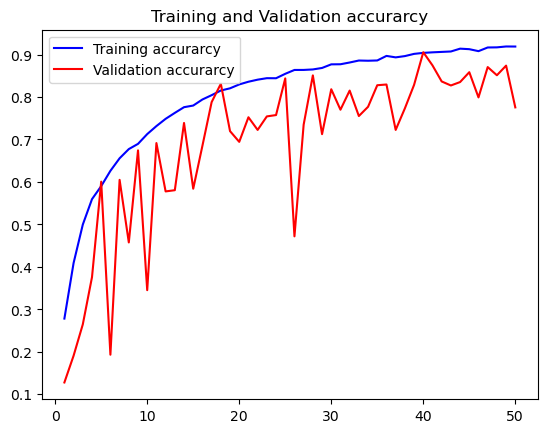

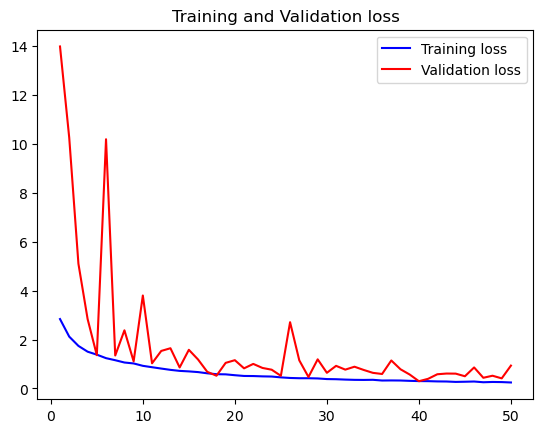

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

convert modèle to tensorflow js

In [ ]:
# !pip install tensorflowjs
# !tensorflowjs_converter --input_format keras "model.h5" /content/jj

In [ ]:
#from sklearn.metrics import classification_report, confusion_matrix
#import numpy as np

#y_pred = googlenet.predict(test_ds)
#y_pred =(y_pred > 0.5)
#list(y_pred)
#cm = confusion_matrix(test_ds, y_pred)
#print(cm)

#y_pred = np.argmax(y_pred)
#print('Confusion Matrix')
#print(classification_report(test_ds.classes, y_pred))
#print(confusion_matrix(test_ds, y_pred))
#print('Classification Report')
#target_names = ['Cats', 'Dogs', 'Horse']
#print(classification_report(validation_generator.classes, y_pred, target_names=target_names))